TP - K-Means : Segmentation Client

Objectif

Réaliser une segmentation client à l'aide de l'algorithme K-Means pour identifier des groupes de clients ayant des comportements similaires à partir de leurs caractéristiques socio-économiques et comportementales.

Structure du notebook

Partie 1 - Préparation des données
Partie 2 - Analyse exploratoire
Partie 3 - Application de K-Means
Partie 4 - Interprétation
Partie 5 - Extension (bonus)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
#note : 
# StandardScaler : Normalisation des données (moyenne 0, écart-type 1) avant le clustering 
# KMeans : Algorithme de clustering K-Means
# DBSCAN : Algorithme de clustering alternatif (détection de densité)
# GaussianMixture : Modèle de mélange gaussien pour clustering probabiliste
# silhouette_score et silhouette_samples : Métriques pour évaluer la qualité du clustering
# PCA : Réduction de dimensionnalité (visualisation en 2D/3D de données multidimensionnelles)
# warnings.filterwarnings('ignore') : Masque les avertissements pour un affichage plus propre

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl") #palette de couleurs pour les graphiques
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Bibliothèques importées avec succès")


✓ Bibliothèques importées avec succès


# Partie 1 – Préparation des données

## 1.1 Chargement et exploration du dataset


In [23]:
df = pd.read_csv('../data/Mall_Customers.csv')

print("Aperçu du dataset")
print(df.head())
print("\nInformations sur le dataset")
print(df.info())
print("\nDimensions")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")


Aperçu du dataset
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informations sur le dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Dim

## 1.2 Vérification des valeurs manquantes


In [24]:
# vérif des valeurs manquantes // neormal pcq c'est un dataset qui vient de kaggle donc il aura 0 erreur
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne")
print(missing_values)
print("\nPourcentage de valeurs manquantes")
print((missing_values / len(df) * 100).round(2))

if missing_values.sum() == 0:
    print("\n✓ Aucune valeur manquante détectée")
else:
    print("\nDes valeurs manquantes ont été détectées - traitement nécessaire")


Valeurs manquantes par colonne
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Pourcentage de valeurs manquantes
CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

✓ Aucune valeur manquante détectée


## 1.3 Statistiques descriptives et distribution des variables


Statistiques descriptives
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


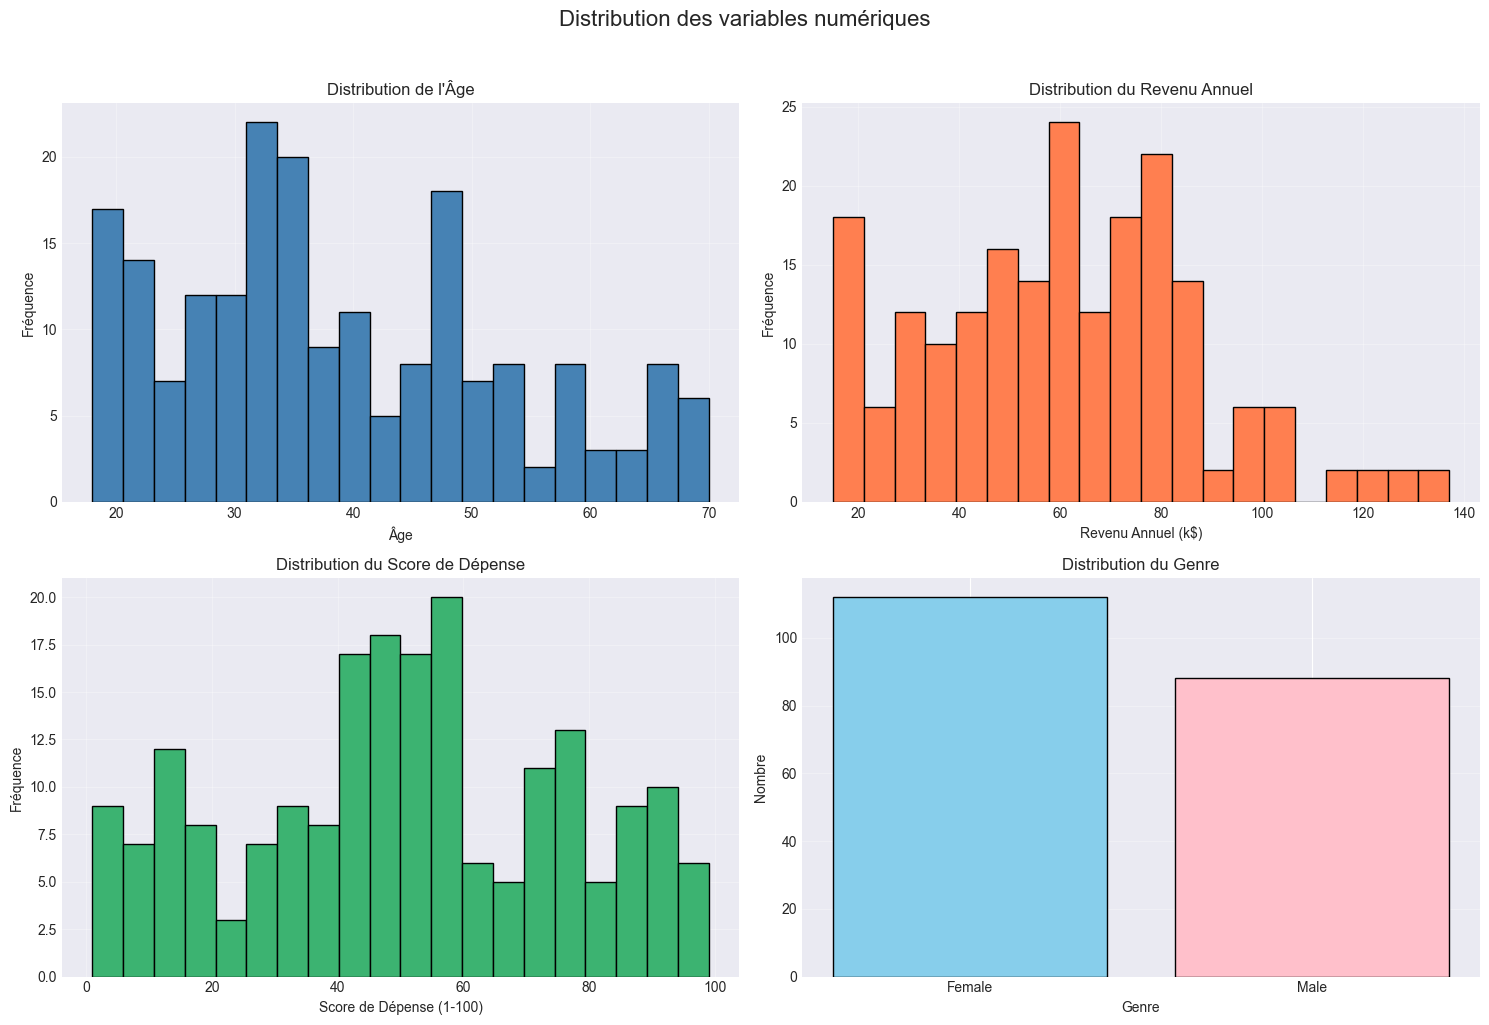

In [25]:
# création de 4 graphiques 

print("Statistiques descriptives")
print(df.describe())

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # permet de créer une grille de 2x2 graphiques
fig.suptitle('Distribution des variables numériques', fontsize=16, y=1.02) #titre principale

#même chose pour les 4 historigrammes

axes[0, 0].hist(df['Age'], bins=20, edgecolor='black', color='steelblue')
axes[0, 0].set_title('Distribution de l\'Âge')
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)#le alpha permet de créer une petite transparence

axes[0, 1].hist(df['Annual Income (k$)'], bins=20, edgecolor='black', color='coral')
axes[0, 1].set_title('Distribution du Revenu Annuel')
axes[0, 1].set_xlabel('Revenu Annuel (k$)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', color='mediumseagreen')
axes[1, 0].set_title('Distribution du Score de Dépense')
axes[1, 0].set_xlabel('Score de Dépense (1-100)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].grid(True, alpha=0.3)

#diagramme

gender_counts = df['Gender'].value_counts()#permet de compter le nb d'occurences de chaque genre
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'], edgecolor='black')
axes[1, 1].set_title('Distribution du Genre')
axes[1, 1].set_xlabel('Genre')
axes[1, 1].set_ylabel('Nombre')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 1.4 Sélection des variables pertinentes


In [26]:
# sélec des variables pertinentes pour le clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

print("Variables sélectionnées")
print(features.head())#affiche les 5 premieres lignes
print("\nStatistiques des variables sélectionnées")
print(features.describe())#affiche les stat


Variables sélectionnées
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

Statistiques des variables sélectionnées
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


## 1.5 Normalisation/Standardisation des variables


In [27]:
# normalisation avec StandardScaler

scaler = StandardScaler()#crée un objet pour normaliser les données (valeur-moyenne)/ecart-type
features_scaled = pd.DataFrame(
    scaler.fit_transform(features),
    columns=features.columns,
    index=features.index
)

print("Variables normalisées")
print(features_scaled.head())
print("\nStatistiques après normalisation")
print(features_scaled.describe())

# vérif : moyenne proche de 0 et écart-type proche de 1
print("\nVérification de la normalisation")
print(f"Moyennes : {features_scaled.mean().values}")
print(f"Écarts-types : {features_scaled.std().values}")


Variables normalisées
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

Statistiques après normalisation
                Age  Annual Income (k$)  Spending Score (1-100)
count  2.000000e+02        2.000000e+02            2.000000e+02
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
std    1.002509e+00        1.002509e+00            1.002509e+00
min   -1.496335e+00       -1.738999e+00           -1.910021e+00
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
50%   -2.045351e-01        3.587926e-02           -7.764312e-03
75%    7.284319e-01        6.656748e-01            8.851316e-01
max    2.235532e+00        2.917671e+00            1.894492e+00

Vérification de la normalisatio

# Partie 2 – Analyse exploratoire

## 2.1 Visualisation des relations entre variables


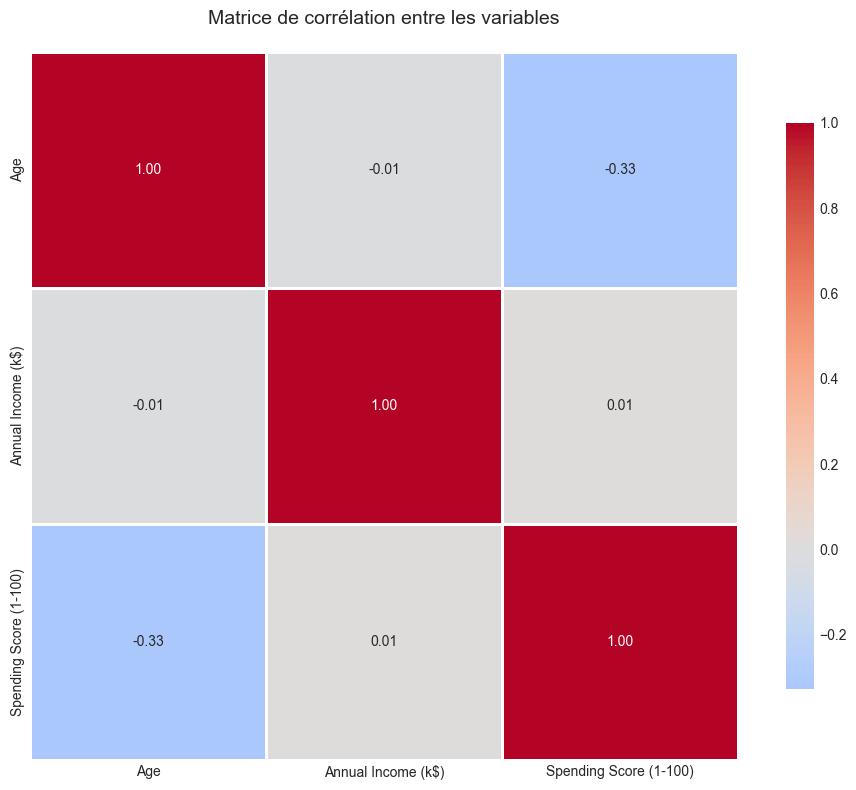

Matrice de corrélation
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [28]:
# création d'une matrice  de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matrice de corrélation entre les variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("Matrice de corrélation")
print(correlation_matrix)


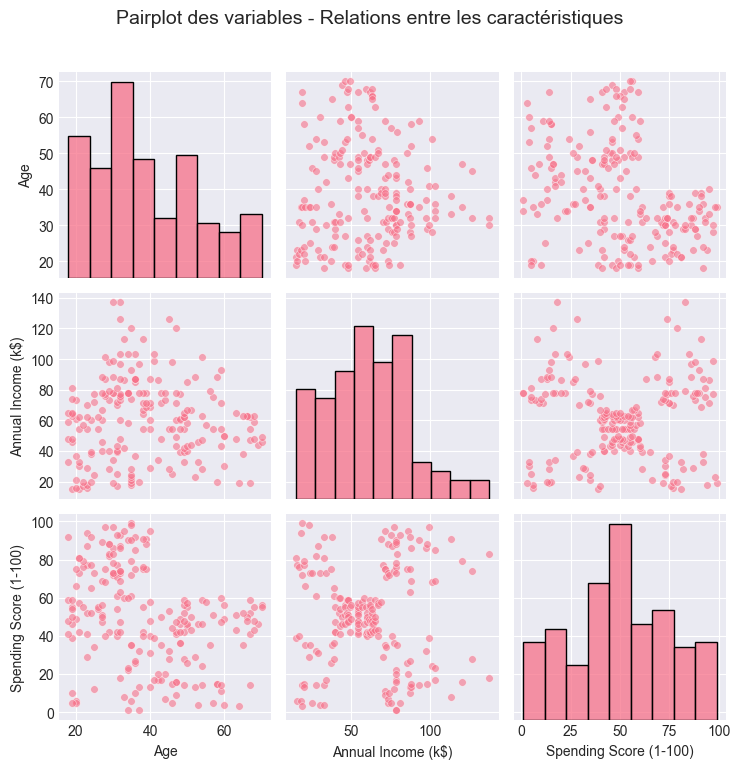

In [29]:
# pairplot des variables
sns.pairplot(features, diag_kind='hist', plot_kws={'alpha': 0.6, 's': 30})#crée une matrice de graphiques ce qui va affichier ttes les combinaisons de variable 22 avec 3 variables =>>3X3
plt.suptitle('Pairplot des variables - Relations entre les caractéristiques', y=1.02, fontsize=14)
plt.tight_layout()#évite chevauchement des graphiques
plt.show()


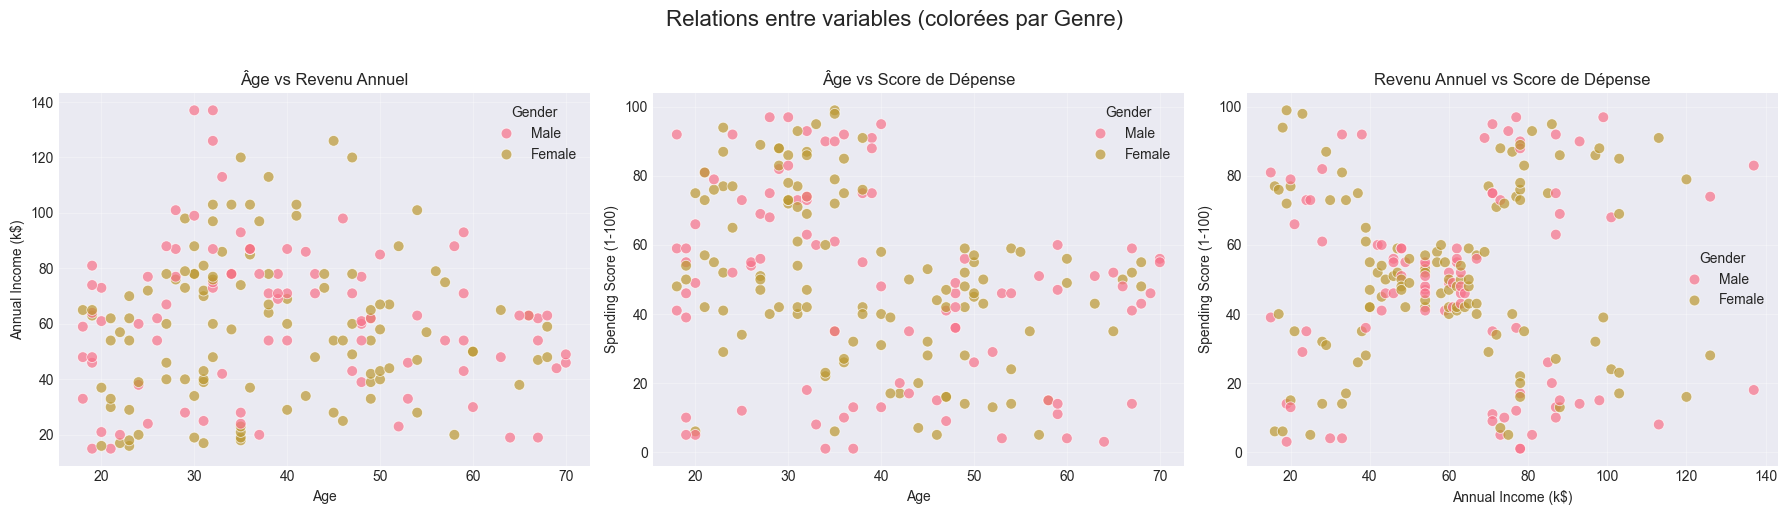

In [30]:
# scatter plots avec coloration par genre
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relations entre variables (colorées par Genre)', fontsize=16, y=1.02)

# age vs annual Income
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', ax=axes[0], s=60, alpha=0.7)
axes[0].set_title('Âge vs Revenu Annuel')
axes[0].grid(True, alpha=0.3)

# age vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', ax=axes[1], s=60, alpha=0.7)
axes[1].set_title('Âge vs Score de Dépense')
axes[1].grid(True, alpha=0.3)

# annual Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', ax=axes[2], s=60, alpha=0.7)
axes[2].set_title('Revenu Annuel vs Score de Dépense')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




**Observations :**
- Le graphique "Revenu Annuel vs Score de Dépense" semble montrer des regroupements naturels
- On peut identifier visuellement 5 groupes potentiels
- Hypothèse initiale : **k = 5 clusters** semble approprié


# Partie 3 – Application de K-Means

## 3.1 Application de K-Means pour k = 2 à 10


In [31]:
# prép des données pour K-Means et convertit le dataframe en tab numpy
X = features_scaled.values

# test de différentes valeurs de k (2 à 10)
k_range = range(2, 11)
inertias = []#liste pour stocker l'inertie
silhouette_scores = []#liste pour  stocker les scores

print("Calcul en cours...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))
    print(f"k={k}: Inertie={kmeans.inertia_:.2f}, Silhouette={silhouette_score(X, labels):.3f}")

print("\n✓ Calcul terminé")


Calcul en cours...
k=2: Inertie=389.39, Silhouette=0.335
k=3: Inertie=295.21, Silhouette=0.358
k=4: Inertie=205.23, Silhouette=0.404
k=5: Inertie=168.25, Silhouette=0.417
k=6: Inertie=133.87, Silhouette=0.428
k=7: Inertie=117.01, Silhouette=0.417
k=8: Inertie=103.87, Silhouette=0.408
k=9: Inertie=93.09, Silhouette=0.418
k=10: Inertie=82.39, Silhouette=0.407

✓ Calcul terminé


## 3.2 Méthode du coude pour choisir le nombre optimal de clusters


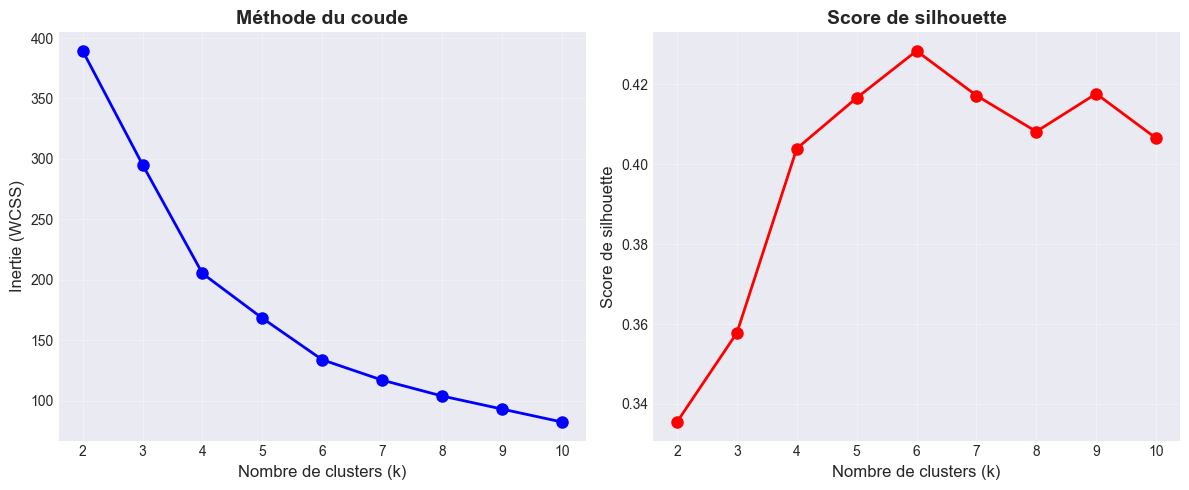


 Résultats 
k optimal selon la silhouette : 6
Score de silhouette maximum : 0.428

Scores de silhouette par k :
  k=2: 0.335
  k=3: 0.358
  k=4: 0.404
  k=5: 0.417
  k=6: 0.428
  k=7: 0.417
  k=8: 0.408
  k=9: 0.418
  k=10: 0.407


In [32]:
# visualisation de la méthode du coude
plt.figure(figsize=(12, 5))

# graph de l'inertie (méthode du coude)
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Inertie (WCSS)', fontsize=12)
plt.title('Méthode du coude', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# graph du score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Score de silhouette', fontsize=12)
plt.title('Score de silhouette', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

# id du k optimal
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\n Résultats ")
print(f"k optimal selon la silhouette : {optimal_k_silhouette}")
print(f"Score de silhouette maximum : {max(silhouette_scores):.3f}")
print(f"\nScores de silhouette par k :")
for k, score in zip(k_range, silhouette_scores):
    print(f"  k={k}: {score:.3f}")


## 3.3 Analyse détaillée du score de silhouette


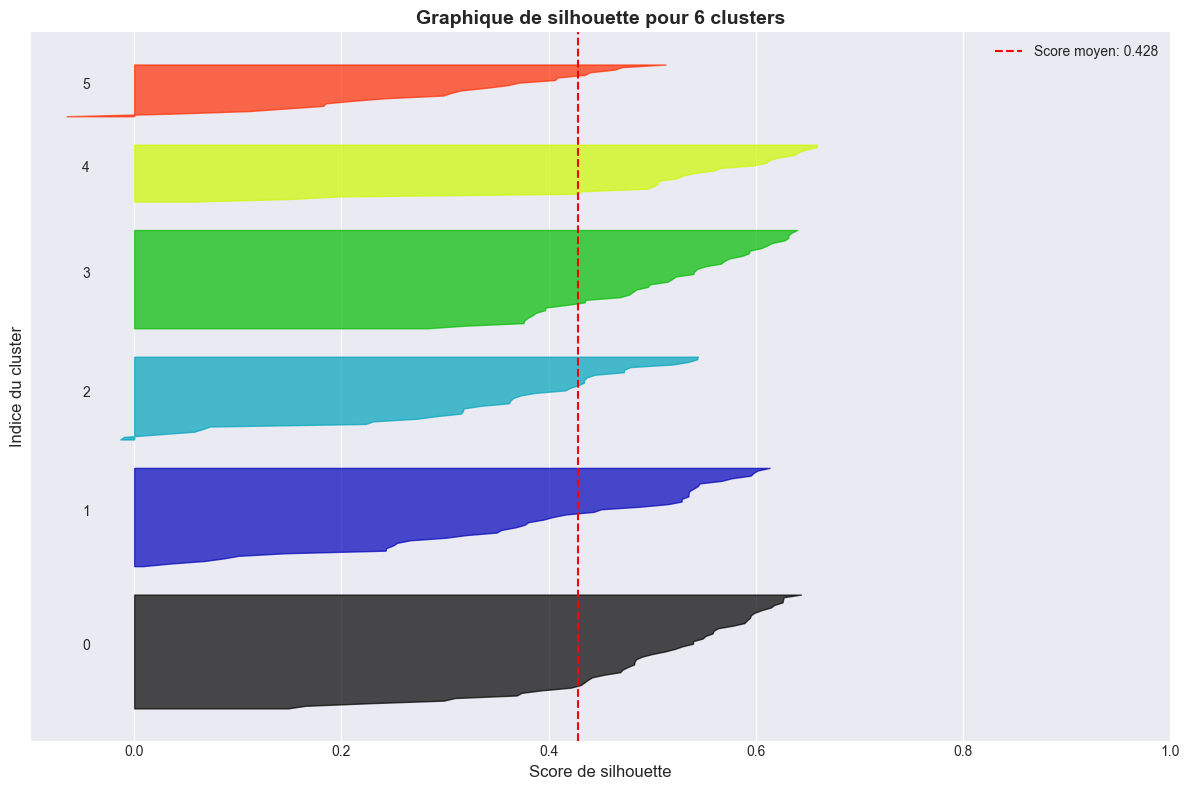

In [33]:
# analyse détaillée de la silhouette pour k optimal
optimal_k = optimal_k_silhouette
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_optimal = kmeans_optimal.fit_predict(X)

# calcul des scores de silhouette par échantillon
sample_silhouette_values = silhouette_samples(X, labels_optimal)

fig, ax = plt.subplots(figsize=(12, 8))
y_lower = 10

#boucle pour chaque clusters

for i in range(optimal_k):
    # scores de silhouette pour le cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels_optimal == i]
    ith_cluster_silhouette_values.sort()#permet de trier les scores
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # étiquette du cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title(f'Graphique de silhouette pour {optimal_k} clusters', fontsize=14, fontweight='bold')
ax.set_xlabel('Score de silhouette', fontsize=12)
ax.set_ylabel('Indice du cluster', fontsize=12)
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.axvline(x=silhouette_scores[optimal_k-2], color="red", linestyle="--", 
           label=f'Score moyen: {silhouette_scores[optimal_k-2]:.3f}')
ax.legend()
plt.tight_layout()
plt.show()


## 3.4 Entraînement du modèle final et ajout de la colonne Cluster


In [34]:
# entraînement du modèle final avec k optimal
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X)

# Aaout de la colonne Cluster au dataset original
df['Cluster'] = final_labels
features['Cluster'] = final_labels

print(f"Modèle final entraîné avec k={optimal_k}")
print(f"Nombre de points par cluster :")
print(pd.Series(final_labels).value_counts().sort_index())
print(f"\nDataset avec clusters")
print(df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))


Modèle final entraîné avec k=6
Nombre de points par cluster :
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64

Dataset avec clusters
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        4
1           2   21                  15                      81        4
2           3   20                  16                       6        5
3           4   23                  16                      77        4
4           5   31                  17                      40        5
5           6   22                  17                      76        4
6           7   35                  18                       6        5
7           8   23                  18                      94        4
8           9   64                  19                       3        5
9          10   30                  19                      72        4


# Partie 4 – Interprétation

## 4.1 Calcul des moyennes des variables par cluster


In [35]:
# stats par cluster
cluster_stats = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std', 'count'])
print("Statistiques par cluster")
print(cluster_stats)

# moyenne par cluster 
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\n Moyennes par cluster")
print(cluster_means.round(2))

# distribution du genre par cluster
print("\n Distribution du Genre par cluster ")
print(pd.crosstab(df['Cluster'], df['Gender'], margins=True))


Statistiques par cluster
               Age                  Annual Income (k$)                   \
              mean        std count               mean        std count   
Cluster                                                                   
0        56.333333   8.453079    45          54.266667   8.975725    45   
1        26.794872   7.056835    39          57.102564  10.161317    39   
2        41.939394  10.179450    33          88.939394  16.586778    33   
3        32.692308   3.728650    39          86.538462  16.312485    39   
4        25.000000   5.300086    23          25.260870   7.723738    23   
5        45.523810  11.766984    21          26.285714   7.437357    21   

        Spending Score (1-100)                   
                          mean        std count  
Cluster                                          
0                    49.066667   6.300794    45  
1                    48.128205   9.966205    39  
2                    16.969697   9.960813    33  

## 4.2 Description du profil typique de chaque segment


In [36]:
# analyse détaillée de chaque cluster
print("PROFILS DES CLUSTERS")

for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id}")
    print(f"Taille : {len(cluster_data)} clients ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"Âge moyen : {cluster_data['Age'].mean():.1f} ans")
    print(f"Revenu annuel moyen : {cluster_data['Annual Income (k$)'].mean():.1f} k$")
    print(f"Score de dépense moyen : {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"Genre : {cluster_data['Gender'].value_counts().to_dict()}")

# attribution de noms aux clusters
cluster_names = {}
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    age = cluster_data['Age'].mean()
    income = cluster_data['Annual Income (k$)'].mean()
    spending = cluster_data['Spending Score (1-100)'].mean()
    
    # détermination du nom basé sur les caractéristiques
    if age < 35 and spending > 50:
        name = "Jeunes dépensiers"
    elif age >= 35 and income > 70 and spending > 50:
        name = "Clients VIP à haut revenu"
    elif income < 50 and spending < 50:
        name = "Clients économes"
    elif income > 70 and spending < 50:
        name = "Clients prudents à haut revenu"
    elif age >= 40 and spending < 50:
        name = "Seniors économes"
    else:
        name = f"Cluster {cluster_id} - Profil mixte"
    
    cluster_names[cluster_id] = name
    print(f"\nCluster {cluster_id} : {name}")

# ajout des noms au dataset
df['Segment'] = df['Cluster'].map(cluster_names)


PROFILS DES CLUSTERS

CLUSTER 0
Taille : 45 clients (22.5%)
Âge moyen : 56.3 ans
Revenu annuel moyen : 54.3 k$
Score de dépense moyen : 49.1
Genre : {'Female': 26, 'Male': 19}

CLUSTER 1
Taille : 39 clients (19.5%)
Âge moyen : 26.8 ans
Revenu annuel moyen : 57.1 k$
Score de dépense moyen : 48.1
Genre : {'Female': 25, 'Male': 14}

CLUSTER 2
Taille : 33 clients (16.5%)
Âge moyen : 41.9 ans
Revenu annuel moyen : 88.9 k$
Score de dépense moyen : 17.0
Genre : {'Male': 19, 'Female': 14}

CLUSTER 3
Taille : 39 clients (19.5%)
Âge moyen : 32.7 ans
Revenu annuel moyen : 86.5 k$
Score de dépense moyen : 82.1
Genre : {'Female': 21, 'Male': 18}

CLUSTER 4
Taille : 23 clients (11.5%)
Âge moyen : 25.0 ans
Revenu annuel moyen : 25.3 k$
Score de dépense moyen : 77.6
Genre : {'Female': 13, 'Male': 10}

CLUSTER 5
Taille : 21 clients (10.5%)
Âge moyen : 45.5 ans
Revenu annuel moyen : 26.3 k$
Score de dépense moyen : 19.4
Genre : {'Female': 13, 'Male': 8}

Cluster 0 : Seniors économes

Cluster 1 : Cluster

## 4.3 Visualisation des profils de clusters


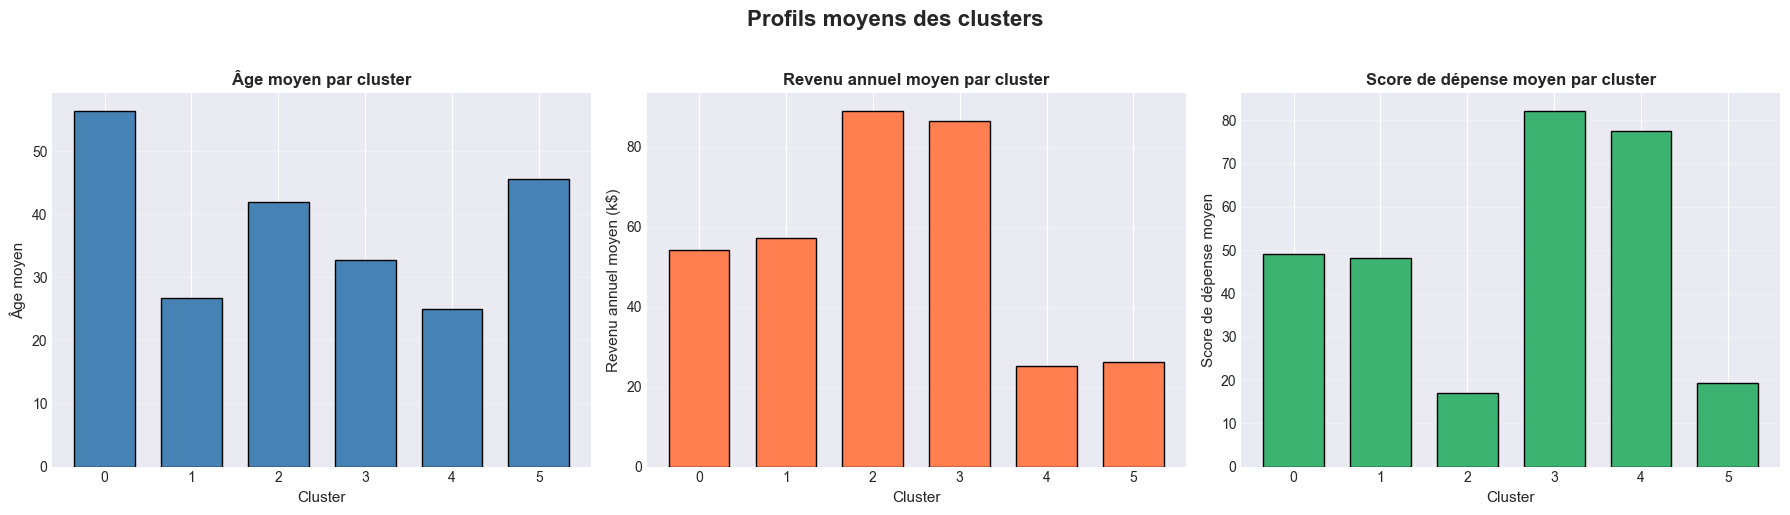

In [37]:
# graphiques en barres des moyennes par cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Profils moyens des clusters', fontsize=16, fontweight='bold', y=1.02)

cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# age
cluster_means['Age'].plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', width=0.7)
axes[0].set_title('Âge moyen par cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11)
axes[0].set_ylabel('Âge moyen', fontsize=11)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# revenu
cluster_means['Annual Income (k$)'].plot(kind='bar', ax=axes[1], color='coral', edgecolor='black', width=0.7)
axes[1].set_title('Revenu annuel moyen par cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=11)
axes[1].set_ylabel('Revenu annuel moyen (k$)', fontsize=11)
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

# score de dépense
cluster_means['Spending Score (1-100)'].plot(kind='bar', ax=axes[2], color='mediumseagreen', edgecolor='black', width=0.7)
axes[2].set_title('Score de dépense moyen par cluster', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Cluster', fontsize=11)
axes[2].set_ylabel('Score de dépense moyen', fontsize=11)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 4.4 Visualisations 2D des clusters


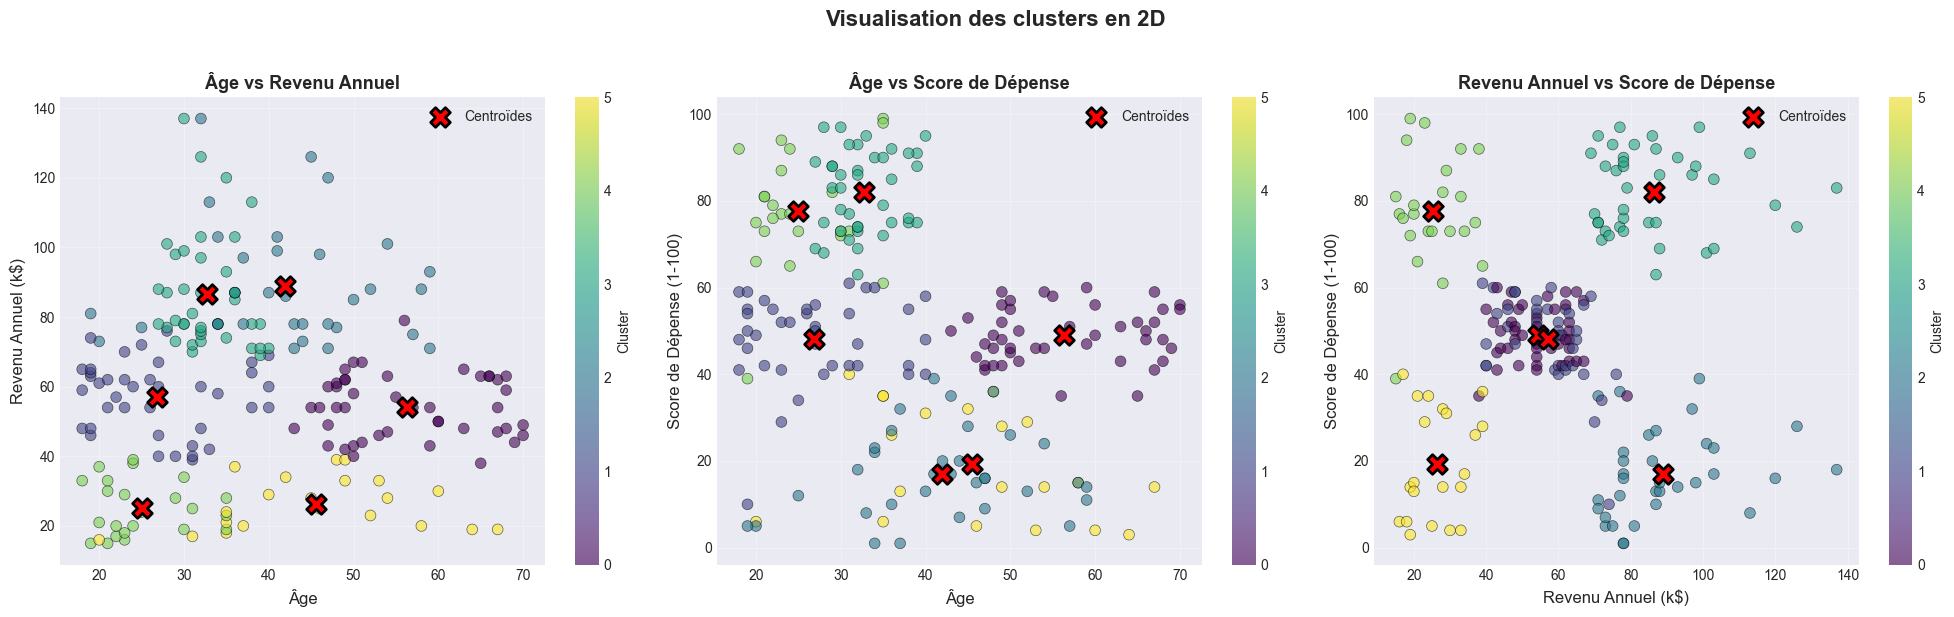

In [38]:
# visualisation 2D des clusters
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Visualisation des clusters en 2D', fontsize=16, fontweight='bold', y=1.02)

# Age vs Annual Income
scatter1 = axes[0].scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], 
                          cmap='viridis', alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Âge', fontsize=12)
axes[0].set_ylabel('Revenu Annuel (k$)', fontsize=12)
axes[0].set_title('Âge vs Revenu Annuel', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Age vs Spending Score
scatter2 = axes[1].scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], 
                          cmap='viridis', alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Âge', fontsize=12)
axes[1].set_ylabel('Score de Dépense (1-100)', fontsize=12)
axes[1].set_title('Âge vs Score de Dépense', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# Annual Income vs Spending Score (le plus informatif)
scatter3 = axes[2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                          c=df['Cluster'], cmap='viridis', alpha=0.6, s=60, 
                          edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Revenu Annuel (k$)', fontsize=12)
axes[2].set_ylabel('Score de Dépense (1-100)', fontsize=12)
axes[2].set_title('Revenu Annuel vs Score de Dépense', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

# ajout des centroïdes
centroids = final_kmeans.cluster_centers_
# transformation inverse pour obtenir les valeurs originales
centroids_original = scaler.inverse_transform(centroids)

axes[0].scatter(centroids_original[:, 0], centroids_original[:, 1], 
               marker='X', s=200, c='red', edgecolors='black', linewidth=2, label='Centroïdes')
axes[1].scatter(centroids_original[:, 0], centroids_original[:, 2], 
               marker='X', s=200, c='red', edgecolors='black', linewidth=2, label='Centroïdes')
axes[2].scatter(centroids_original[:, 1], centroids_original[:, 2], 
               marker='X', s=200, c='red', edgecolors='black', linewidth=2, label='Centroïdes')

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()


## 4.5 Visualisation 3D des clusters


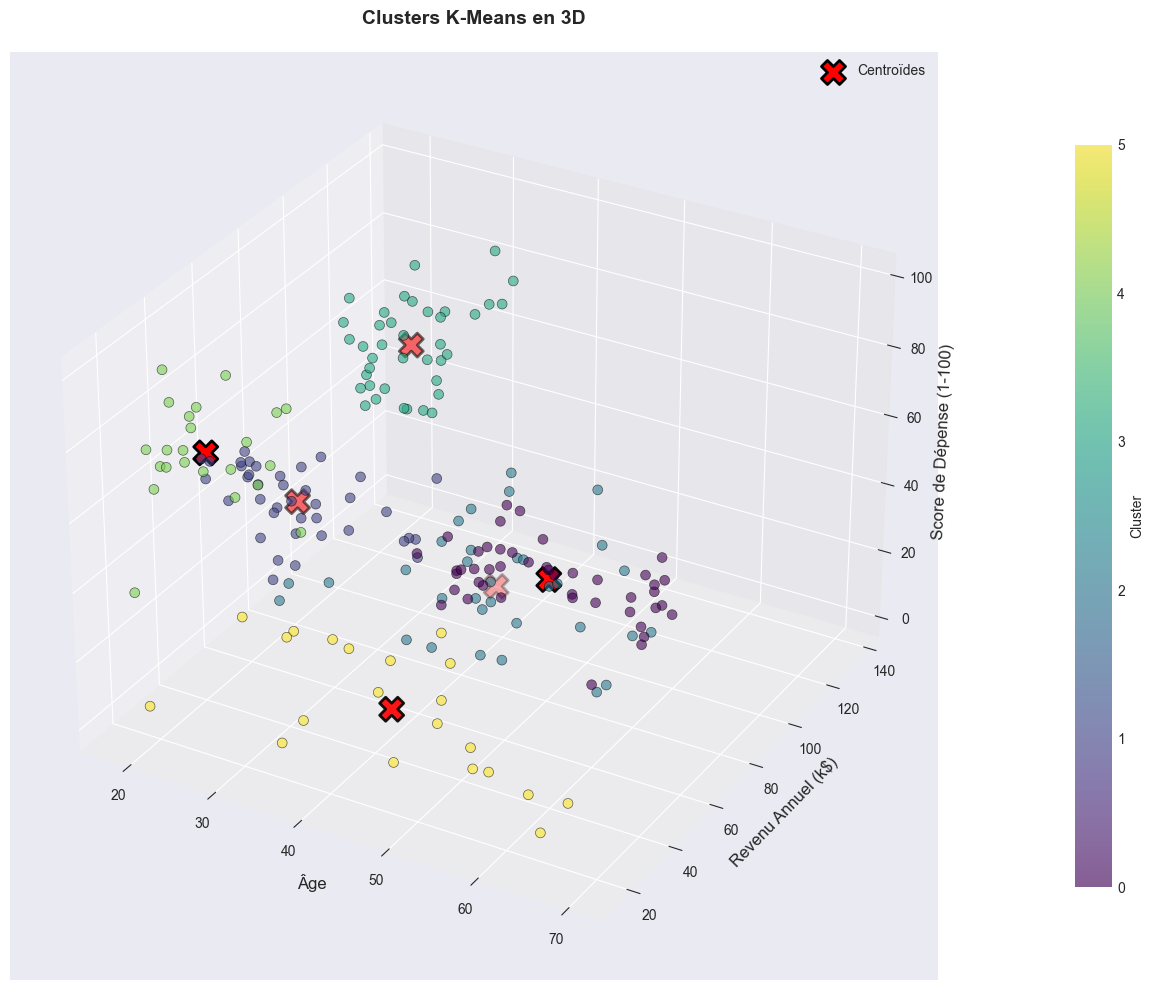

In [39]:
# visualisation 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# scatter plot 3D
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                    c=df['Cluster'], cmap='viridis', s=50, alpha=0.6,
                    edgecolors='black', linewidth=0.5)

# centroïdes en 3D
ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2],
          marker='X', s=300, c='red', edgecolors='black', linewidth=2, label='Centroïdes')

ax.set_xlabel('Âge', fontsize=12)
ax.set_ylabel('Revenu Annuel (k$)', fontsize=12)
ax.set_zlabel('Score de Dépense (1-100)', fontsize=12)
ax.set_title('Clusters K-Means en 3D', fontsize=14, fontweight='bold', pad=20)
ax.legend()

plt.colorbar(scatter, label='Cluster', ax=ax, shrink=0.8, pad=0.1)
plt.tight_layout()
plt.show()


# Partie 5 – Extension (Bonus)

## 5.1 Comparaison avec DBSCAN


Résultats DBSCAN
Nombre de clusters : 6
Points considérés comme bruit : 60 (30.0%)
Distribution des clusters :
-1    60
 0    17
 1     5
 2    51
 3    28
 4    32
 5     7
Name: count, dtype: int64


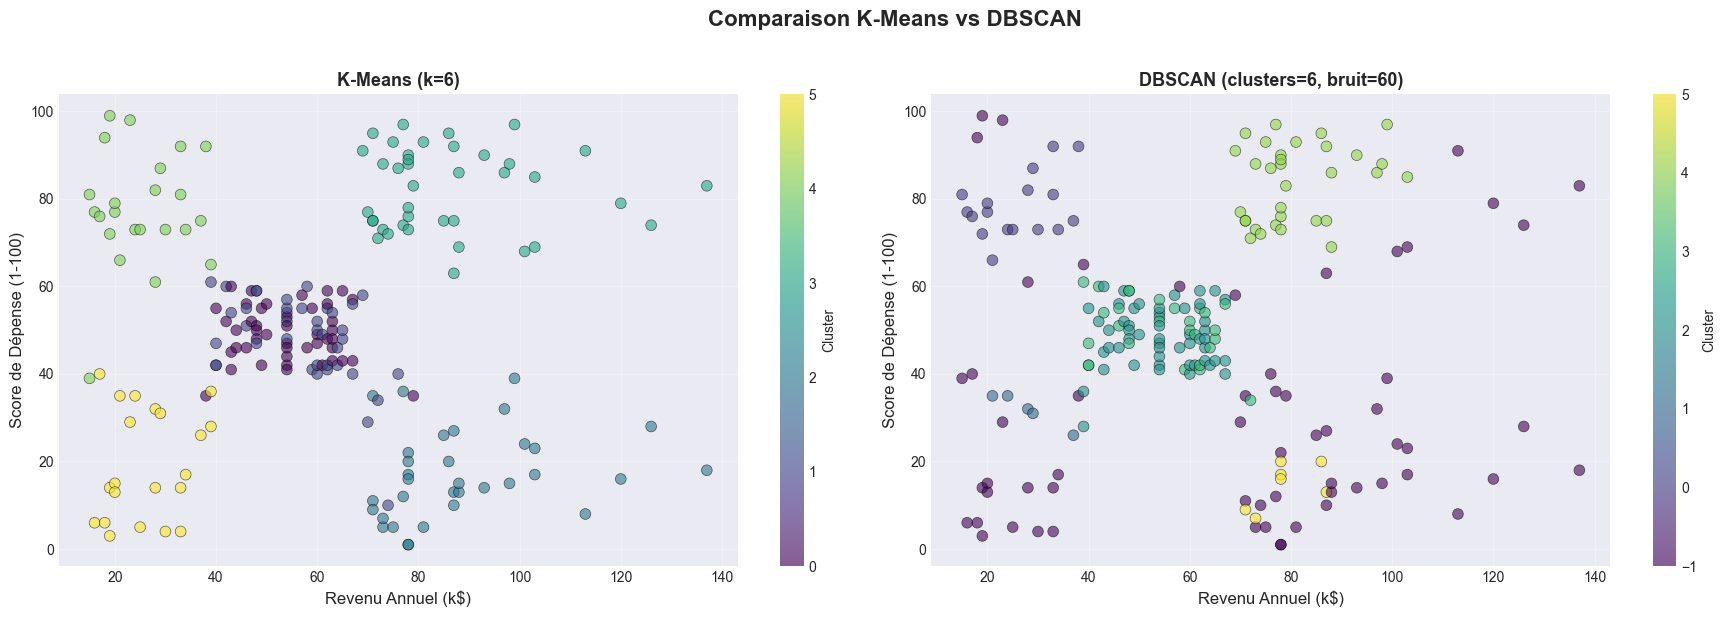

In [40]:
# application de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# analyse des résultats DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Résultats DBSCAN")
print(f"Nombre de clusters : {n_clusters_dbscan}")
print(f"Points considérés comme bruit : {n_noise} ({n_noise/len(X)*100:.1f}%)")
print(f"Distribution des clusters :")
print(pd.Series(dbscan_labels).value_counts().sort_index())

# visualisation DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparaison K-Means vs DBSCAN', fontsize=16, fontweight='bold', y=1.02)

# K-Means
scatter1 = axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                          c=df['Cluster'], cmap='viridis', alpha=0.6, s=60,
                          edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Revenu Annuel (k$)', fontsize=12)
axes[0].set_ylabel('Score de Dépense (1-100)', fontsize=12)
axes[0].set_title(f'K-Means (k={optimal_k})', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# DBSCAN
scatter2 = axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                          c=dbscan_labels, cmap='viridis', alpha=0.6, s=60,
                          edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Revenu Annuel (k$)', fontsize=12)
axes[1].set_ylabel('Score de Dépense (1-100)', fontsize=12)
axes[1].set_title(f'DBSCAN (clusters={n_clusters_dbscan}, bruit={n_noise})', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()


# Conclusion

## Résumé des résultats

1. **Nombre optimal de clusters** : Déterminé par la méthode du coude et le score de silhouette
2. **Segments identifiés** : Profils distincts de clients avec caractéristiques homogènes
3. **Qualité du clustering** : Évaluée par le score de silhouette
4. **Comparaisons** : K-Means comparé avec DBSCAN 
## Prochaines étapes

- Affiner les segments avec des données supplémentaires
- Implémenter des campagnes marketing ciblées
- Suivre l'évolution des segments dans le temps
- Valider les recommandations avec des tests A/B
